<a href="https://colab.research.google.com/github/nikithamurugan2525-bit/AI-Model-Meta-card-Generator/blob/main/Indian_Food_Classification_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [58]:
df = pd.read_csv("indian_food.csv")

print(df.head())
print(df.isnull().sum())

             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  
name              0
ingredients       0
diet

In [59]:
df = df.dropna(subset=["name", "ingredients", "region", "state"])

df["text"] = df["name"] + " " + df["ingredients"]

In [60]:
X = df["text"]
y_region = df["region"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X,
    y_region,
    test_size=0.2,
    random_state=42,
    stratify=y_region
)

region_model = Pipeline([
    ("tfidf", TfidfVectorizer(
        stop_words="english",
        ngram_range=(1, 2),
        min_df=2
    )),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])

region_model.fit(X_train_r, y_train_r)

y_pred_r = region_model.predict(X_test_r)
print("\nRegion Accuracy:", accuracy_score(y_test_r, y_pred_r))


Region Accuracy: 0.49019607843137253


In [61]:
# count samples per state
state_counts = df["state"].value_counts()

# keep only states with at least 2 samples
valid_states = state_counts[state_counts >= 2].index

df_state = df[df["state"].isin(valid_states)]

X = df_state["text"]
y_state = df_state["state"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X,
    y_state,
    test_size=0.2,
    random_state=42,
    stratify=y_state
)


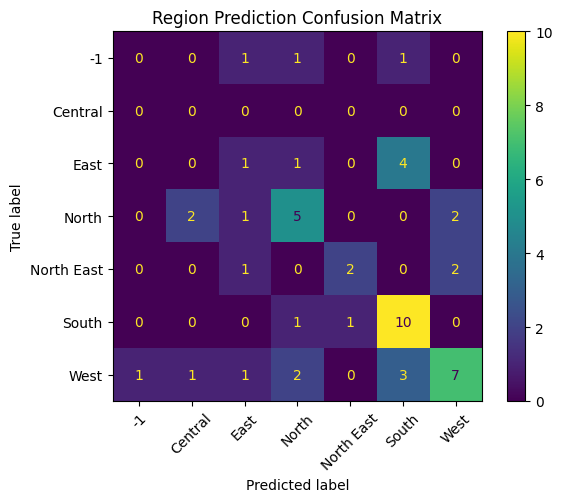

In [62]:
cm = confusion_matrix(y_test_r, y_pred_r, labels=region_model.classes_)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=region_model.classes_
)

disp.plot(xticks_rotation=45)
plt.title("Region Prediction Confusion Matrix")
plt.show()

In [63]:
def predict_origin_from_user():
    while True:
        dish = input("\nDish name (or 'exit'): ")
        if dish.lower() == "exit":
            print("Exiting...")
            break

        ingredients = input("Ingredients: ")

        text = dish + " " + ingredients

        region_pred = region_model.predict([text])[0]
        state_pred = state_model.predict([text])[0]

        print("\nPrediction Result")
        print("-----------------")
        print(f"Dish Name       : {dish}")
        print(f"Predicted Region: {region_pred}")
        print(f"Predicted State : {state_pred}")


predict_origin_from_user()


Dish name (or 'exit'): Rasgula
Ingredients: Paner

Prediction Result
-----------------
Dish Name       : Rasgula
Predicted Region: West
Predicted State : Punjab

Dish name (or 'exit'): Pongal
Ingredients: Rice

Prediction Result
-----------------
Dish Name       : Pongal
Predicted Region: North East
Predicted State : Tamil Nadu

Dish name (or 'exit'): Balu shahi
Ingredients: Maida

Prediction Result
-----------------
Dish Name       : Balu shahi
Predicted Region: East
Predicted State : West Bengal

Dish name (or 'exit'): exit
Exiting...
